# Converter : Symbolic Music representations


In [5]:
from midiConverter import Converter
from Visualizer import Visualizer
from MidiLikeSeq import MidiLikeSeq
from NoteTupleSeq import NoteTupleSeq
import matplotlib.pyplot as plt

import pandas as pd
import pretty_midi as pm
from note_seq.protobuf import music_pb2
import note_seq
import glob

## Midi to Midi-Like

In [6]:
c = Converter()
midi_like_seq = c.midi2midi_like("bassline.mid")
midi_like_seq.show()

seq = c.midi_like2seq(midi_like_seq)
note_seq.sequence_proto_to_midi_file(seq, 'bassline-midi-like.mid')


SET_VELOCITY<50.0>
NOTE_ON<37>
TIME_SHIFT<0.1363635>
NOTE_OFF<37.0>
TIME_SHIFT<0.1363635>
NOTE_ON<38>
TIME_SHIFT<0.818181>
NOTE_OFF<38.0>
NOTE_ON<39>
TIME_SHIFT<0.13636349999999997>
NOTE_OFF<39.0>
NOTE_ON<39>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<39.0>
NOTE_ON<40>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<40.0>
NOTE_ON<39>
TIME_SHIFT<1.6363619999999999>
NOTE_OFF<39.0>
NOTE_ON<40>
TIME_SHIFT<0.1363635000000003>
NOTE_OFF<40.0>
NOTE_ON<36>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<36.0>
NOTE_ON<38>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<38.0>
NOTE_ON<46>
TIME_SHIFT<0.1363635000000003>
NOTE_OFF<46.0>
NOTE_ON<43>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<43.0>
NOTE_ON<36>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<36.0>
NOTE_ON<37>
TIME_SHIFT<0.1363635000000003>
NOTE_OFF<37.0>
NOTE_ON<38>
TIME_SHIFT<0.4090904999999996>
NOTE_OFF<38.0>
NOTE_ON<38>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<38.0>
NOTE_ON<37>
TIME_SHIFT<0.13636350000000075>
NOTE_OFF<37.0>
NOTE_ON<36>
TIME_SHIFT<1.9090889999999998

Number of instruments :  1


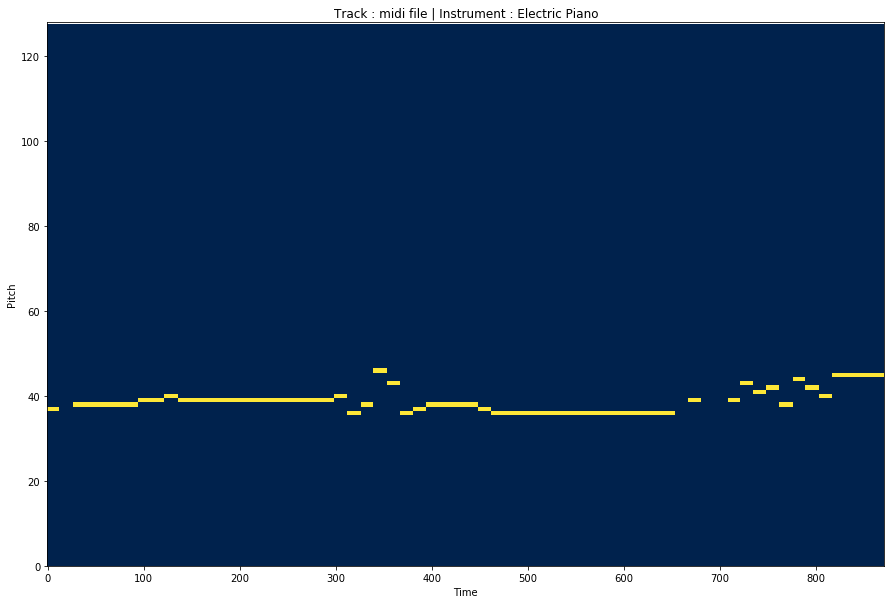

In [7]:
midi_data = pm.PrettyMIDI('bassline.mid')
v1 = Visualizer(midi_data)
v1.show_midi_notes(DEBUG = True)

Number of instruments :  1


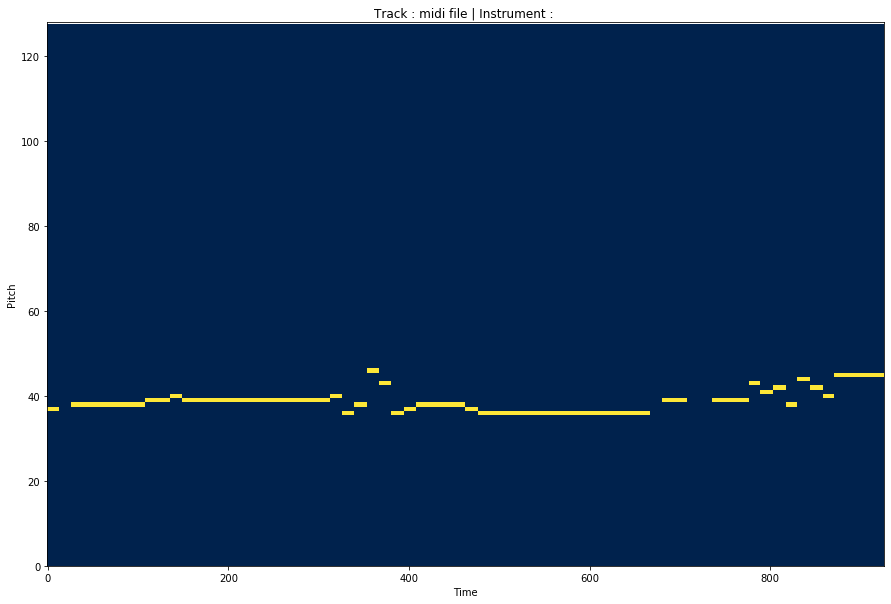

In [8]:

midi_data = pm.PrettyMIDI('bassline-midi-like.mid')
v2 = Visualizer(midi_data)

v2.show_midi_notes(DEBUG = True)


### Comparison between original and reconstruct : 

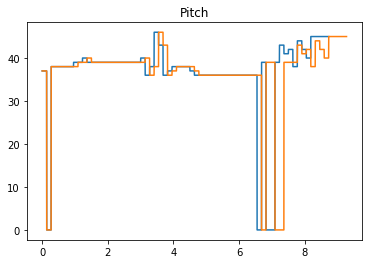

In [9]:


t1, p1, l1 = v1.get_time_f0_loudness()
t2, p2, l2 = v2.get_time_f0_loudness()

plt.plot(t1, p1[0], label = "original")
plt.plot(t2, p2[0], label = "reconstruct")
plt.title("Pitch")
plt.show()

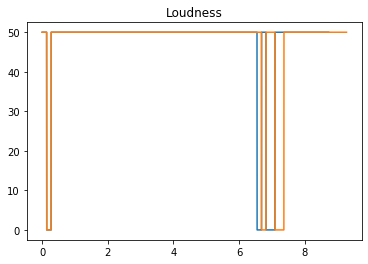

In [10]:
plt.plot(t1, l1[0], label = "original")
plt.plot(t2, l2[0], label = "reconstruct")
plt.title("Loudness")
plt.show()

## Midi to Note tuple :


Converting midi to note tuple : 

In [11]:
c = Converter()

note_tuple_seq = c.midi2note_tuple("bassline.mid")
note_tuple_seq

(0,0,37,50,0,13)
(0,27,38,50,1,28)
(0,68,39,50,0,13)
(0,13,39,50,0,13)
(0,13,40,50,0,13)
(0,13,39,50,4,3)
(2,9,40,50,0,13)
(0,13,36,50,0,13)
(0,13,38,50,0,13)
(0,13,46,50,0,13)
(0,13,43,50,0,13)
(0,13,36,50,0,13)
(0,13,37,50,0,13)
(0,13,38,50,1,0)
(0,40,38,50,0,13)
(0,13,37,50,0,13)
(0,13,36,50,4,30)
(2,50,39,50,0,13)
(0,40,39,50,0,13)
(0,13,43,50,0,13)
(0,13,41,50,0,13)
(0,13,42,50,0,13)
(0,13,38,50,0,13)
(0,13,44,50,0,13)
(0,13,42,50,0,13)
(0,13,40,50,0,13)
(0,13,45,50,1,14)

Converting back to midi

In [12]:
seq = c.note_tuple2seq(note_tuple_seq)
note_seq.sequence_proto_to_midi_file(seq, 'bassline-note-tuple.mid')

Checking results :

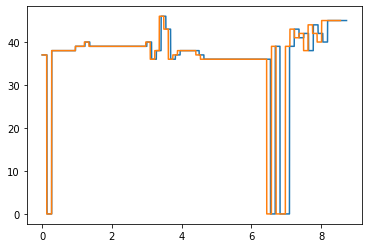

In [13]:
midi_data = pm.PrettyMIDI('bassline.mid')
v1 = Visualizer(midi_data)
midi_data = pm.PrettyMIDI('bassline-note-tuple.mid')
v2 = Visualizer(midi_data)



t1, p1, l1 = v1.get_time_f0_loudness()
t2, p2, l2 = v2.get_time_f0_loudness()

plt.plot(t1, p1[0], label = "original")
plt.plot(t2, p2[0], label = "reconstruct")
plt.show()